<a href="https://colab.research.google.com/github/datxander/Process-mining/blob/main/NetworkX_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reference link

https://www.kaggle.com/code/alireza151/networkx-tutorial


In [ ]:
!pip install networkx

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

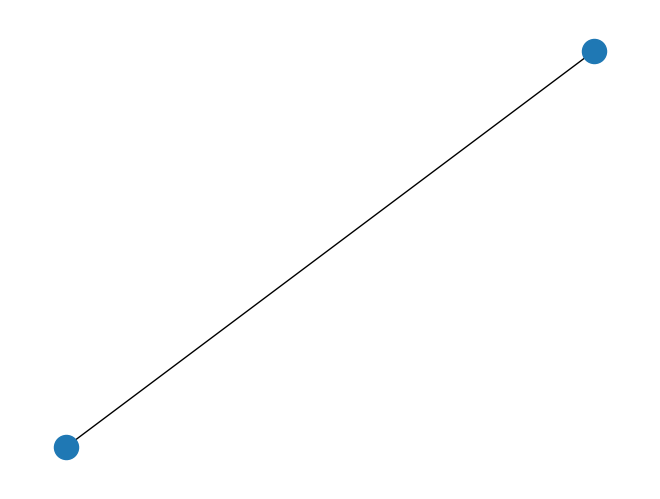

In [ ]:
# Draw a simple network - Undirected & unweighted

G = nx.Graph()
G.add_edge("A", "B")

nx.draw(G)

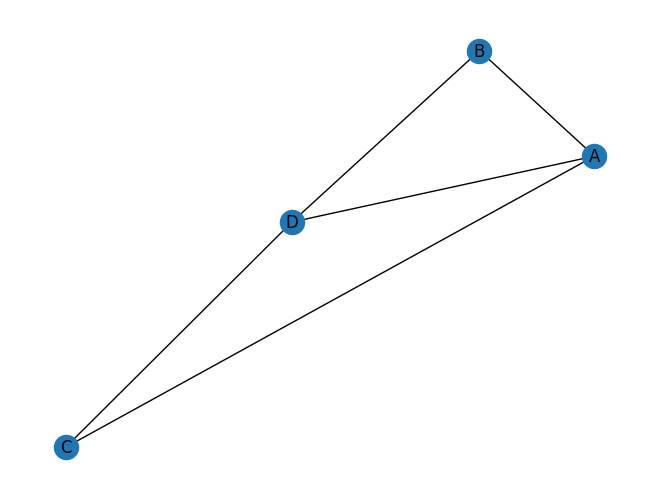

In [ ]:
# Weighted network

G_W = nx.Graph()

G_W.add_edge("A", "B", weight=6)
G_W.add_edge("A", "C", weight=0.2)
G_W.add_edge("A", "D", weight=3)
G_W.add_edge("B", "D", weight=2)
G_W.add_edge("C", "D", weight=1)

nx.draw(G_W, with_labels = True)

In [ ]:
# List the edges alone
list(G_W.edges())

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'D'), ('C', 'D')]

In [ ]:
# List them with their weights
list(G_W.edges(data = True))

[('A', 'B', {'weight': 6}),
 ('A', 'C', {'weight': 0.2}),
 ('A', 'D', {'weight': 3}),
 ('B', 'D', {'weight': 2}),
 ('C', 'D', {'weight': 1})]

In [ ]:
# Get the dictionary elements from this
G_W.edges["A", "D"]
G_W.edges["B", "D"]["weight"]


2

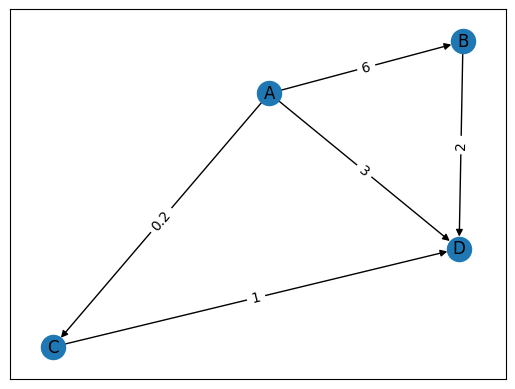

In [ ]:
# Directed graphs

G_D = nx.DiGraph()

G_D.add_edge("A", "B", weight=6)
G_D.add_edge("A", "C", weight=0.2)
G_D.add_edge("A", "D", weight=3)
G_D.add_edge("B", "D", weight=2)
G_D.add_edge("C", "D", weight=1)

# Create a dictionary for node positions

#pos = nx.spring_layout(G_D)
#pos = nx.circular_layout(G_D)
#pos = nx.spectral_layout(G_D)
#pos = nx.shell_layout(G_D)
#pos = nx.kamada_kawai_layout(G_D)
pos = nx.fruchterman_reingold_layout(G_D)


# Draw the graph

nx.draw_networkx_nodes(G_D, pos)
nx.draw_networkx_edges(G_D, pos)
nx.draw_networkx_labels(G_D, pos)

# Create a dictionary for edge labels

edge_labels = dict([((u, v), d["weight"]) for u, v, d in G_D.edges(data = True)])

# Draw the edge labels
nx.draw_networkx_edge_labels(G_D, pos, edge_labels = edge_labels)

# Display the plot
import matplotlib.pyplot as plt
plt.show()


Each layout algorithm has its strengths and weaknesses, and the best one to use depends on the characteristics of the graph and the goals of the visualization. NetworkX allows you to easily apply these layout algorithms to your graphs and create visualizations that help you understand and communicate the structure of the network.






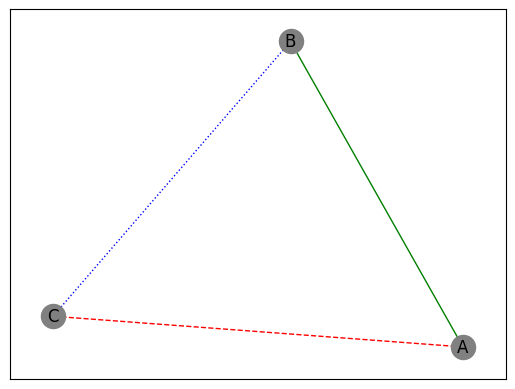

In [ ]:
# Signed network

S_G = nx.Graph()

S_G.add_edge("A", "B", sign="+")
S_G.add_edge("A", "C", sign="-")
S_G.add_edge("B", "C", sign = "*")

# Choose layout
pos = nx.fruchterman_reingold_layout(S_G)

# Create dictionary of edge colors based on their signs
edge_colors = {'+' : 'green', '-' : 'red', '*' : 'blue'}
colors = [edge_colors[S_G[u][v]['sign']] for u,v in S_G.edges()]

# Create a dictionary of edge styles too
edge_styles = {'+' : 'solid', '-' : 'dashed', '*' : 'dotted'}
styles = [edge_styles[S_G[u][v]['sign']] for u,v in S_G.edges()]

# Draw the graph
nx.draw_networkx_nodes(S_G, pos, node_color = 'grey')
nx.draw_networkx_edges(S_G, pos, edge_color = colors, style = styles)
nx.draw_networkx_labels(S_G, pos)

# Display plot
plt.show()

# Multigraph

A MultiGraph is a type of graph in NetworkX that allows multiple edges between a pair of nodes. In other words, a MultiGraph can have parallel edges, while a standard Graph can only have a single edge between any pair of nodes.

In simpler terms, a MultiGraph is a network where multiple edges can connect the same nodes.

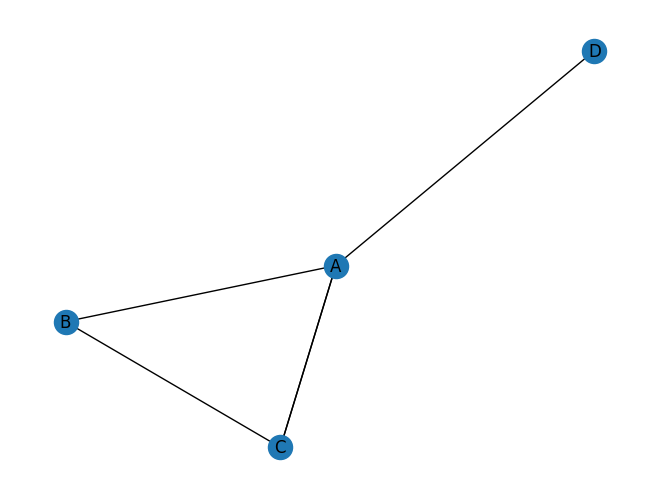

In [ ]:
#Multigraph

M_G = nx.MultiGraph()

M_G.add_edge("A", "B", relation = "Firm", weight = 3)
M_G.add_edge("A", "C", relation = "City", weight = 4)
M_G.add_edge("B", "C", relation = "College", weight = 2)
M_G.add_edge("A", "D", relation = "State", weight = 2)
M_G.add_edge("C", "A", relation = "State", weight = 2)

nx.draw(M_G, with_labels = True)







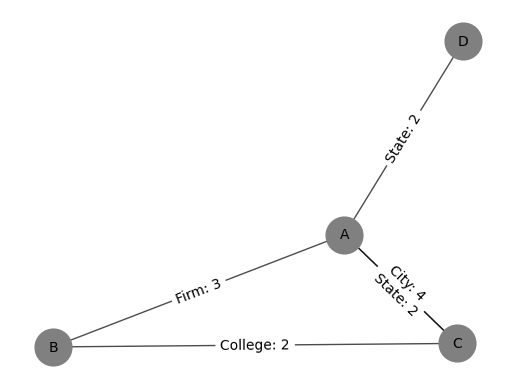

In [ ]:
# Let's draw a better visual

# Node positions
pos = nx.fruchterman_reingold_layout(M_G)

#Draw the nodes
nx.draw_networkx_nodes(M_G,pos,node_color = 'grey',node_size = 700)

#Draw the edges
edge_labels = {}
for u,v,d in M_G.edges(data = True):
  if(u,v) in edge_labels:
    edge_labels[(u,v)] += "\n" + d["relation"] + ": " + str(d["weight"])
  else:
    edge_labels[(u,v)] = d["relation"] + ": " + str(d["weight"])

nx.draw_networkx_edges(M_G,pos,width = 1, alpha= 0.7)
nx.draw_networkx_edge_labels(M_G,pos,edge_labels = edge_labels,font_size = 10)
nx.draw_networkx_labels(M_G,pos, font_size=10,font_family = "sans-serif")

plt.axis('off')
plt.show()




# Bipartite graphs

A bipartite graph is a type of graph in which the nodes can be divided into two disjoint sets, such that all edges connect a node from one set to a node in the other set. In other words, there are no edges that connect nodes within the same set.

Bipartite graphs are useful for modeling relationships between two different types of entities, such as buyers and sellers in a market, or actors and movies in a film industry.

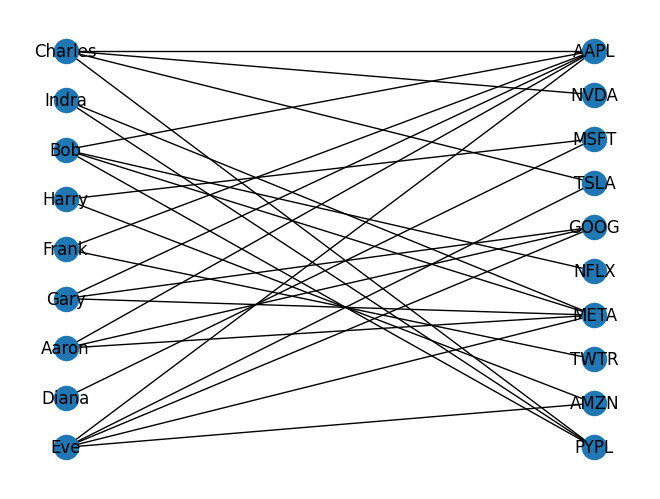

In [2]:
# Advisors & stocks example

from networkx.algorithms import bipartite

# Stockholder list
stockholders = ['Aaron', 'Bob', 'Charles', 'Diana', 'Eve', 'Frank', 'Gary', 'Harry', 'Indra']

# Stocks list
stocks = ['AAPL', 'GOOG', 'TSLA', 'AMZN', 'META', 'MSFT', 'NVDA', 'PYPL', 'NFLX', 'TWTR']

# Create the graph
B = nx.Graph()

# add nodes from these lists
B.add_nodes_from(stockholders, bipartite = 0)
B.add_nodes_from(stocks, bipartite = 1)

# Add edges at random
import random
while not nx.is_connected(B):
  B.add_edge(random.choice(stockholders), random.choice(stocks))

# Draw this graph
pos = nx.bipartite_layout(B,stockholders)
nx.draw(B, pos, with_labels = True)

plt.show()


# Add edges

In [6]:
# the 2 sets of the bipartite network
bipartite.sets(B)

({'Aaron',
  'Bob',
  'Charles',
  'Diana',
  'Eve',
  'Frank',
  'Gary',
  'Harry',
  'Indra'},
 {'AAPL',
  'AMZN',
  'GOOG',
  'META',
  'MSFT',
  'NFLX',
  'NVDA',
  'PYPL',
  'TSLA',
  'TWTR'})

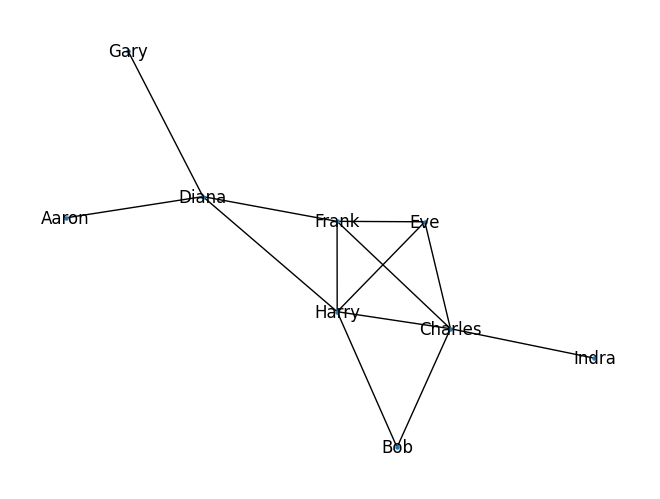

In [8]:
# The L-partite graph will show the stockholders who are connected through a common stock

P = bipartite.projected_graph(B,bipartite.sets(B)[0])
nx.draw(P, with_labels = True, node_size = 5)
plt.show()

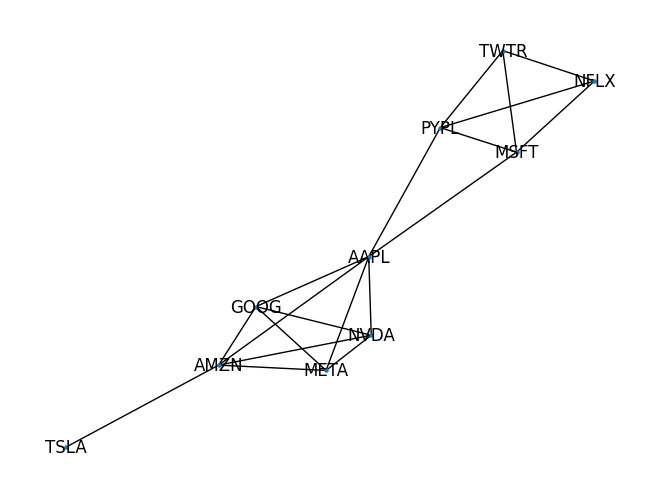

In [9]:
# The R-partite graph will show the stocks connected by common advisors

P = bipartite.projected_graph(B,bipartite.sets(B)[1])
nx.draw(P, with_labels = True, node_size = 5)
plt.show()

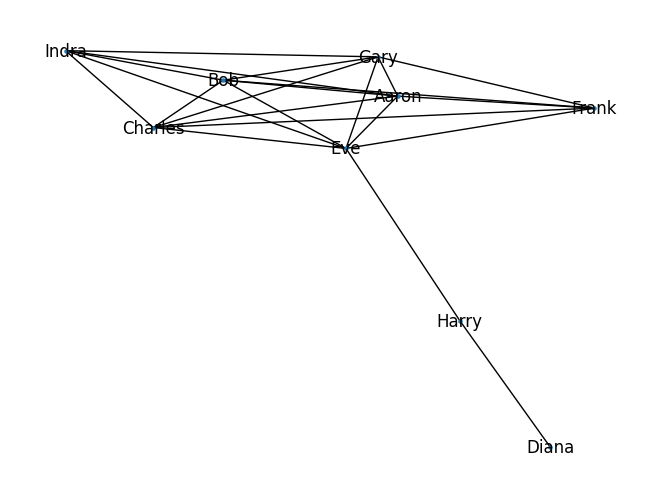

In [4]:
# Weighted bi-partite graphs

# The weighted L-partite graph adjsuts for how many stocks are in common between 2 advisors
P = bipartite.weighted_projected_graph(B,bipartite.sets(B)[0])
nx.draw(P, with_labels = True, node_size = 5)
plt.show()


# Degree

The degree of a node in a network is the number of edges that it is connected to

In [13]:
# Degree of a graph node

P.degree('Indra')



1

In [14]:
# All degrees

dict(P.degree())

{'Bob': 2,
 'Indra': 1,
 'Harry': 5,
 'Diana': 4,
 'Frank': 4,
 'Charles': 5,
 'Gary': 1,
 'Eve': 3,
 'Aaron': 1}

# Neighborhood

The neighborhood of a node *i*  is the set of nodes that are directly connected to *i*  by an edge.

In [16]:
node = 'Frank'
neighborhood = list(P.neighbors(node))
print(neighborhood)

['Harry', 'Diana', 'Charles', 'Eve']


# Triadic closure & clustering coefficient

Triadic closure refers to the tendency for people who share connections in a social network to become connected, also known as the "friend of a friend" effect.

One measure of triadic closure in a network is the clustering coefficient, which quantifies the degree to which nodes tend to cluster together in triads. The clustering coefficient of a node is defined as the fraction of the node's neighbors that are also neighbors of each other. The clustering coefficient of a network is the average clustering coefficient over all nodes in the network.

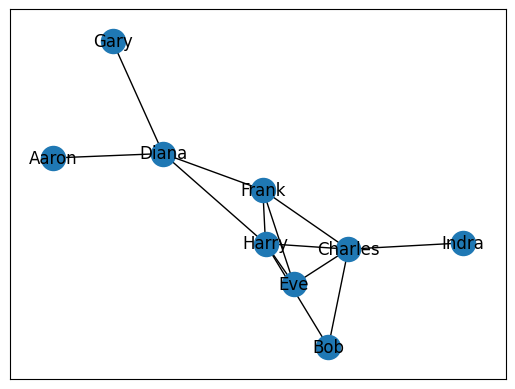

In [17]:
nx.draw_networkx(P)

In [5]:
# Clustering coefficients for each node
nx.clustering(P)

{'Bob': 0.9333333333333333,
 'Eve': 0.6666666666666666,
 'Aaron': 0.9333333333333333,
 'Diana': 0,
 'Frank': 1.0,
 'Harry': 0,
 'Gary': 0.9333333333333333,
 'Indra': 1.0,
 'Charles': 0.9333333333333333}

In [6]:
#Global clustering coefficient
nx.average_clustering(P)

0.7111111111111111

Transitivity

Transitivity is a property of a network that measures the likelihood that, if two nodes in the network share a common neighbor, they will also be directly connected to each other. In other words, it measures the tendency for "triangles" to form in the network.

Formally, the transitivity of a network is defined as the ratio of the number of triangles in the network to the number of connected triples of nodes (i.e., triples of nodes that are directly connected to each other or share a common neighbor). In mathematical notation, the transitivity of a network is given by:


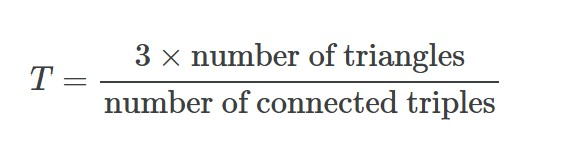

A high transitivity indicates that nodes in the network tend to form clusters or communities, while a low transitivity indicates that the network is more of a random or decentralized structure. Transitivity is closely related to the concept of clustering coefficient, which measures the tendency for nodes to form local clusters or neighborhoods.

In [7]:
nx.transitivity(P)

0.8823529411764706

Path

A path between 2 nodes A & B in a network is a sequence of nodes A,X1,X2,...,B and a sequence of edges (A,X1), (X1,X2)...(Xn,B), where each node and edge in the sequence is adjacent to the previous and next node or edge in the sequence.

The shortest path between two nodes is the path with the minimum length that connects them.

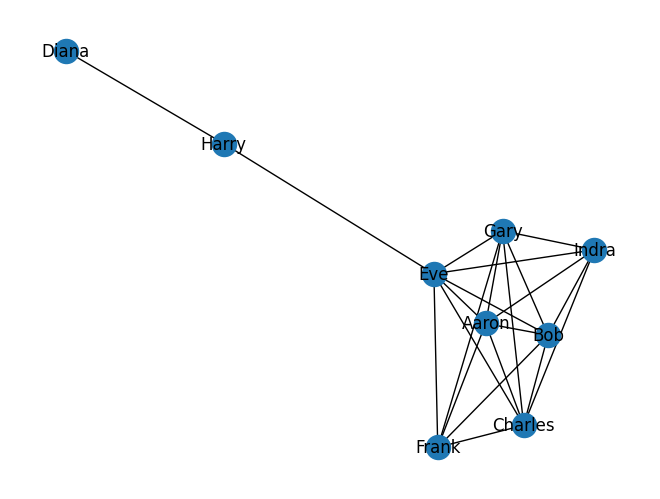

In [8]:
nx.draw(P, with_labels=True)

In [12]:
# Generate all simple paths between Charles and Diana

paths = nx.all_simple_paths(P, 'Charles', 'Diana')
for path in paths:
    print(path)


['Charles', 'Bob', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob', 'Aaron', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob', 'Aaron', 'Frank', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob', 'Aaron', 'Frank', 'Gary', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob', 'Aaron', 'Frank', 'Gary', 'Indra', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob', 'Aaron', 'Gary', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob', 'Aaron', 'Gary', 'Frank', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob', 'Aaron', 'Gary', 'Indra', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob', 'Aaron', 'Indra', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob', 'Aaron', 'Indra', 'Gary', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob', 'Aaron', 'Indra', 'Gary', 'Frank', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob', 'Frank', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob', 'Frank', 'Aaron', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob', 'Frank', 'Aaron', 'Gary', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob', 'Frank', 'Aaron', 'Gary', 'Indra', 'Eve', 'Harry', 'Diana']
['Charles', 'Bob

In [19]:
paths = nx.all_simple_paths(P, source='Charles', target='Diana')
Path_List = [path for path in paths]
print(Path_List)


[['Charles', 'Bob', 'Eve', 'Harry', 'Diana'], ['Charles', 'Bob', 'Aaron', 'Eve', 'Harry', 'Diana'], ['Charles', 'Bob', 'Aaron', 'Frank', 'Eve', 'Harry', 'Diana'], ['Charles', 'Bob', 'Aaron', 'Frank', 'Gary', 'Eve', 'Harry', 'Diana'], ['Charles', 'Bob', 'Aaron', 'Frank', 'Gary', 'Indra', 'Eve', 'Harry', 'Diana'], ['Charles', 'Bob', 'Aaron', 'Gary', 'Eve', 'Harry', 'Diana'], ['Charles', 'Bob', 'Aaron', 'Gary', 'Frank', 'Eve', 'Harry', 'Diana'], ['Charles', 'Bob', 'Aaron', 'Gary', 'Indra', 'Eve', 'Harry', 'Diana'], ['Charles', 'Bob', 'Aaron', 'Indra', 'Eve', 'Harry', 'Diana'], ['Charles', 'Bob', 'Aaron', 'Indra', 'Gary', 'Eve', 'Harry', 'Diana'], ['Charles', 'Bob', 'Aaron', 'Indra', 'Gary', 'Frank', 'Eve', 'Harry', 'Diana'], ['Charles', 'Bob', 'Frank', 'Eve', 'Harry', 'Diana'], ['Charles', 'Bob', 'Frank', 'Aaron', 'Eve', 'Harry', 'Diana'], ['Charles', 'Bob', 'Frank', 'Aaron', 'Gary', 'Eve', 'Harry', 'Diana'], ['Charles', 'Bob', 'Frank', 'Aaron', 'Gary', 'Indra', 'Eve', 'Harry', 'Diana'], 

In [21]:
# Check if a path is valid
P1 = Path_List[0]
is_valid = nx.is_simple_path(P, P1)
print(is_valid)

True


In [22]:
nx.is_simple_path(P,['Charles','Indra', 'Diana'])

False

In [23]:
# Get the edge list for P1
edge_list = [(P1[i], P1[i+1]) for i in range(len(P1)-1)]
print(edge_list)

[('Charles', 'Bob'), ('Bob', 'Eve'), ('Eve', 'Harry'), ('Harry', 'Diana')]


In [25]:
# Get the weight for P1
weight = sum(P[u][v]['weight'] for u,v in edge_list if 'weight' in P[u][v])
print(weight)

6
